In [1]:
library(keras)
library(data.table)

In [2]:
data("crqa", package = "crqa")

In [3]:
# datanya
typeof(RDts1)

[1] "list"

In [4]:
# jumlah data
nrow(RDts1)

[1] 2000

In [5]:
head(RDts1)
tail(RDts1)

,V1
,<int>
1,10
2,2
3,2
4,10
5,10
6,10


,V1
,<int>
1995,1
1996,1
1997,1
1998,1
1999,1
2000,1


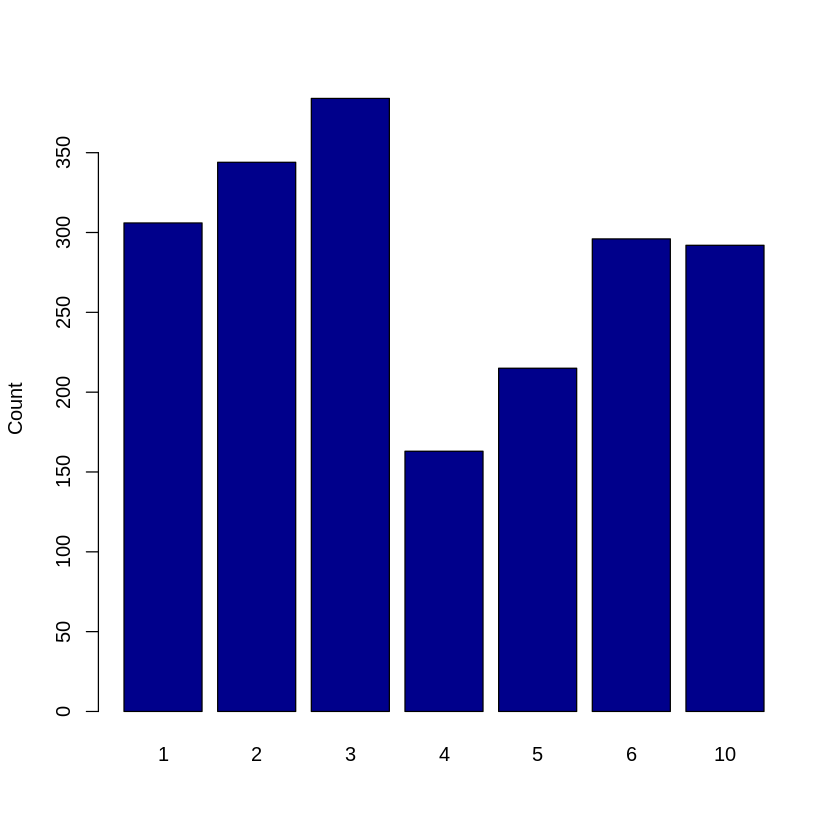

In [6]:
barplot(table(RDts1), ylab="Count", col="darkblue")

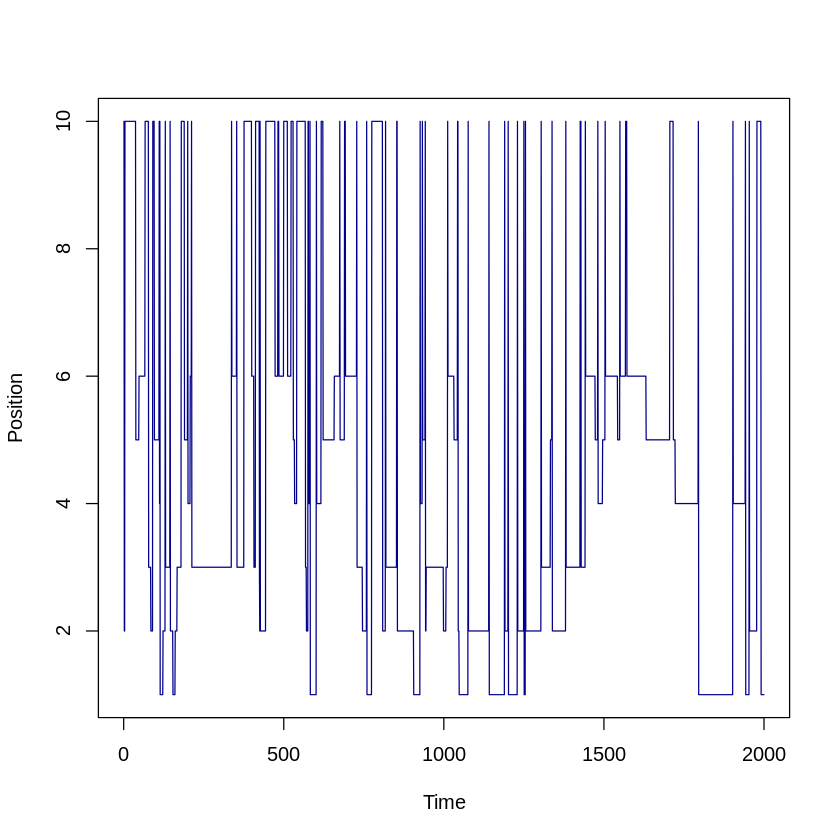

In [7]:
plot(as.ts(RDts1), col="darkblue", ylab="Position")

In [8]:
# training set

seq_1 <- RDts1[1:100,]
seq_2 <- RDts1[101:200,]
seq_3 <- RDts1[201:300,]
data <- cbind(seq_1,seq_2,seq_3)

lab_1 <- RDts1[2:101,]
lab_2 <- RDts1[102:201,]
lab_3 <- RDts1[202:301,]
lab <- cbind(lab_1,lab_2,lab_3)

data_set = aperm((array(c(data), dim = c(100,3))))
labels_set = aperm(array(c(lab), dim = c(100,3)))
dim(data_set)
dim(labels_set)

trainDat <- list(data = data_set, label = labels_set)
summary(trainDat)

[1]   3 100

[1]   3 100

      Length Class  Mode   
data  300    -none- numeric
label 300    -none- numeric

In [9]:
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.

# batch_size = 1
# seq.len = 3
# num.hidden = 25
# num.embed = 2
# num_layer = 1
# num_round = 2
# update.period = 1
# learning.rate = 0.3
# num_labels = 7
# input_size = 7
# moment = 0.9

In [ ]:
## Define the model that will turn
## `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model <- keras_model( inputs = list(encoder_inputs, decoder_inputs),
                      outputs = decoder_outputs )

## Compile model
model %>% compile(optimizer='rmsprop', loss='categorical_crossentropy')

## Run model
model %>% fit( list(encoder_input_data, decoder_input_data), decoder_target_data,
               batch_size=batch_size,
               epochs=epochs,
               validation_split=0.2)

## Save model
save_model_hdf5(model,'s2s.h5')
save_model_weights_hdf5(model,'s2s-wt.h5')

In [11]:
head(training)

10,5,4
2,5,4
2,5,4
10,5,4
10,5,4
10,5,4


In [12]:
typeof(training)

[1] "integer"

In [13]:
head(training_target)

2,5,4
2,5,4
10,5,4
10,5,4
10,5,4
10,5,4


In [14]:
nrow(training)

[1] 100

In [15]:
set.seed(17)
ind <- sample(2, nrow(training), replace = TRUE, prob = c(0.7, 0.3))

In [16]:
# Initialize the model

model <- keras_model_sequential()

model %>%
 layer_dense(units = ncol(training_target), 
             activation = 'softmax',
             input_shape = ncol(training))

summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 3)                       12          
Total params: 12
Trainable params: 12
Non-trainable params: 0
________________________________________________________________________________


In [17]:
model$inputs

[[1]]
Tensor("dense_input:0", shape=(None, 3), dtype=float32)


In [21]:
sgd <- optimizer_sgd(lr = 0.01)

model %>% compile(
 loss = 'categorical_crossentropy',
 optimizer = sgd,
 metrics = 'accuracy'
)

In [22]:
history <- model %>% fit(
 x = training,
 y = training_target,
 epochs = 100,
 batch_size = 5,
 validation_split = 0.2,
 verbose = 0
)

`geom_smooth()` using formula 'y ~ x'



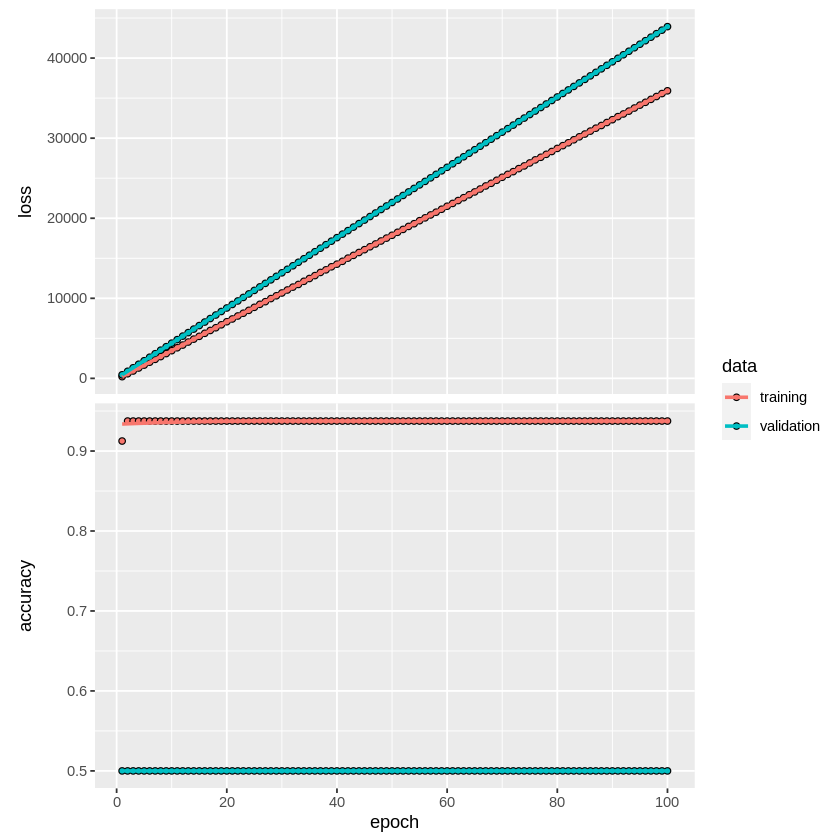

In [23]:
plot(history)